# Medical Image Analysis using Convolutional Neural Networks

In this project, we will build a CNN Model to classify Medical Images.

In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-08-20 11:23:33.634333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Build CNN Model

In [5]:
def Build_CNN_Model():
    
    # -------------------------------------------------------------------------
    #                        Build CNN Model 
    # -------------------------------------------------------------------------
    model = Sequential()  
    
    #  First Block of CNN
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))   
    
    #  Second Block of CNN
    model.add(Conv2D(64, (3, 3),  padding='same'))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    
    #  Third Block of CNN
    model.add(Conv2D(128, (3, 3), padding='same'))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))      
    
    #  Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(1000))
    model.add(Activation('relu'))     
    
    #  Softmax Classifier
    model.add(Dense(2))
    model.add(Activation('softmax'))        
    
    #  Display model
    model.summary()    
	
    # compile model
    opt = SGD(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model     

### Train The Model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 activation_30 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 activation_31 (Activation)  (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

Epoch 41/100
19/19 [==============================] - 35s 2s/step - loss: 0.1992 - accuracy: 0.9317 - val_loss: 0.2002 - val_accuracy: 0.9375
Epoch 42/100
19/19 [==============================] - 34s 2s/step - loss: 0.1904 - accuracy: 0.9317 - val_loss: 0.2022 - val_accuracy: 0.9350
Epoch 43/100
19/19 [==============================] - 34s 2s/step - loss: 0.1998 - accuracy: 0.9217 - val_loss: 0.2268 - val_accuracy: 0.9125
Epoch 44/100
19/19 [==============================] - 33s 2s/step - loss: 0.2998 - accuracy: 0.8700 - val_loss: 0.1904 - val_accuracy: 0.9300
Epoch 45/100
19/19 [==============================] - 31s 2s/step - loss: 0.2312 - accuracy: 0.9217 - val_loss: 0.1970 - val_accuracy: 0.9175
Epoch 46/100
19/19 [==============================] - 32s 2s/step - loss: 0.3342 - accuracy: 0.8450 - val_loss: 0.1775 - val_accuracy: 0.9500
Epoch 47/100
19/19 [==============================] - 31s 2s/step - loss: 0.1672 - accuracy: 0.9533 - val_loss: 0.1996 - val_accuracy: 0.9350
Epoch 

Epoch 99/100
19/19 [==============================] - 33s 2s/step - loss: 0.1561 - accuracy: 0.9433 - val_loss: 0.4961 - val_accuracy: 0.8250
Epoch 100/100
19/19 [==============================] - 32s 2s/step - loss: 0.0953 - accuracy: 0.9617 - val_loss: 0.1312 - val_accuracy: 0.9550


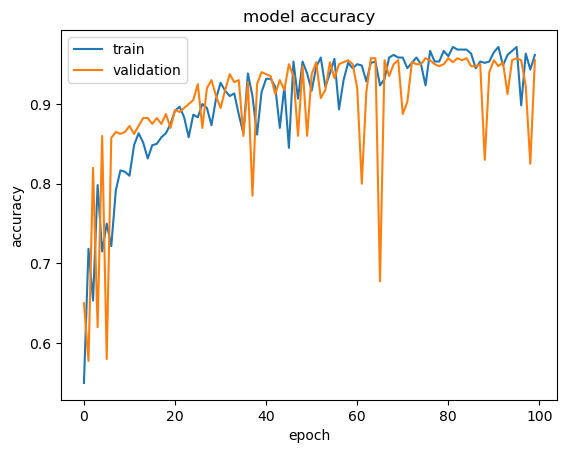

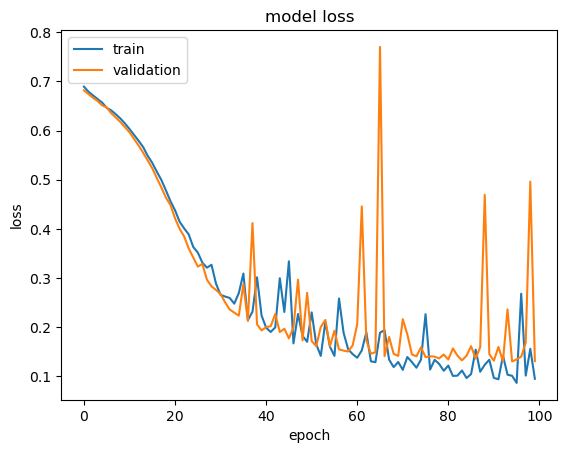

In [11]:
def Train_CNN_Model(model):
    
    # -------------------------------------------------------------------------
    #                        Train CNN Model 
    # -------------------------------------------------------------------------
    
    # create data generators    
    train_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
    valid_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
   
    # prepare iterators
    batch_size=32
    train_it = train_datagen.flow_from_directory('Final Dataset/train/',classes =('abnormal','normal'),batch_size=batch_size, target_size=(224, 224))
    valid_it = valid_datagen.flow_from_directory('Final Dataset/val/',classes =('abnormal','normal'),batch_size=batch_size, target_size=(224, 224))


    epochs=100;
    
    history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=valid_it, validation_steps=len(valid_it), epochs=epochs, verbose=1)
    
    
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

	# save model
    model.save('medical_diagnosis_cnn_model.h5')
    

# main entry 
model = Build_CNN_Model()

Train_CNN_Model(model)

### Evaluate The Model

In [19]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt_False_Positive_vs_True_Positive
from keras.models import load_model

Found 590 images belonging to 2 classes.


/Users/ibrahimirfan/anaconda3/lib/python3.10/site-packages/keras/preprocessing/image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/ibrahimirfan/anaconda3/lib/python3.10/site-packages/keras/preprocessing/image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


19/19 [==============================] - 9s 423ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Confusion Matrix
 -------------------------
[[110 124]
 [351   5]]
Accuracy: 0.194915
Precision: 0.038760
Recall: 0.014045
F1 score: 0.020619
ROC AUC: 0.062350


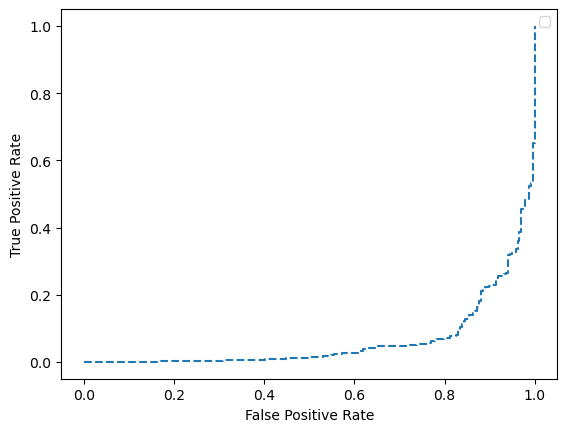

In [23]:
def Evaluate_CNN_Model():
    # -------------------------------------------------------------------------
    #                        Evaluate CNN Model 
    # -------------------------------------------------------------------------
    
    # Load Model
    model = load_model("medical_diagnosis_cnn_model.h5")
    
    # Load Test Data
    batch_size=32
    test_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
    test_it = test_datagen.flow_from_directory('Final Dataset/test/',classes =('normal','abnormal'), 
                                               shuffle=False,batch_size=batch_size, target_size=(224, 224))
    
    y_true = test_it.classes;

    y_pred = model.predict(test_it, steps=len(test_it), verbose=1)

    
    y_pred_prob = y_pred[:,1]

     
    y_pred_binary =  y_pred_prob > 0.5
   
    #Confution Matrix    
    print('\nConfusion Matrix\n -------------------------')    
    print(confusion_matrix(y_true,y_pred_binary));
    
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_true, y_pred_binary)
    print('Accuracy: %f' % accuracy)
    
    
    # precision tp / (tp + fp)
    precision = precision_score(y_true, y_pred_binary)
    print('Precision: %f' % precision)
    
    # recall: tp / (tp + fn)
    recall = recall_score(y_true, y_pred_binary)
    print('Recall: %f' % recall)
    
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_true, y_pred_binary)
    print('F1 score: %f' % f1)    
       
    # ROC AUC
    auc = roc_auc_score(y_true, y_pred_prob)
    print('ROC AUC: %f' % auc)
    
    
    # calculate roc curves
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
        
    # plot the roc curve for the model
    plt.figure()
    plt_False_Positive_vs_True_Positive.plot(fpr, tpr, linestyle='--', label='')
    
    # axis labels
    plt_False_Positive_vs_True_Positive.xlabel('False Positive Rate')
    plt_False_Positive_vs_True_Positive.ylabel('True Positive Rate')
       
    # show the legend
    plt_False_Positive_vs_True_Positive.legend()
    # show the plot
    plt_False_Positive_vs_True_Positive.show()
    
Evaluate_CNN_Model()

## Improving The Model

### Hyperparameter Tuning

Our model needs some improvements, so therefore we will start off by performing hyperparameter tuning. We will perform this step by modifying our CNN Architecture. 

To improve our CNN Model, we will perform the following optimization techniques
* Data Augmentation
* Using Dropout Regularization 
* Batch Normalization
* Using Leaky ReLU Activation 
* Early Stopping

In [25]:
from keras.models import Sequential,load_model
from keras.layers import LeakyReLU,Conv2D,Activation, MaxPooling2D,Dense,Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt_False_Positive_vs_True_Positive
from keras.callbacks import EarlyStopping

In [29]:
def Build_CNN_Model():
    
    # -------------------------------------------------------------------------
    #                        Build CNN Model 
    # -------------------------------------------------------------------------
    model = Sequential()
    
    #  First Block of CNN
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))  
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2)))
    
    #  Second Block of CNN
    model.add(Conv2D(64, (3, 3),  padding='same'))  
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2)))

    #  Third Block of CNN
    model.add(Conv2D(128, (3, 3), padding='same'))  
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2))) 
    
    #  Forth Block of CNN
    model.add(Conv2D(16, (3, 3),  padding='same'))  
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2)))
    
    #  Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(10))
    model.add(LeakyReLU(alpha=0.1))
     
    #  Softmax Classifier
    model.add(Dense(2))
    model.add(Activation('softmax'))
        
    #  Display model
    model.summary()
    
	# compile model

    opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

/Users/ibrahimirfan/anaconda3/lib/python3.10/site-packages/keras/preprocessing/image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/ibrahimirfan/anaconda3/lib/python3.10/site-packages/keras/preprocessing/image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/100
19/19 [==============================] - 26s 1s/step - loss: 0.6977 - accuracy: 0.4917 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 25s 1s/step - loss: 0.6693 - accuracy: 0.6250 - val_loss: 0.5946 - val_accuracy: 0.6300
Epoch 3/100
19/19 [==============================] - 25s 1s/step - loss: 0.5234 - accuracy: 0.7400 - val_loss: 0.5995 - val_accuracy: 0.7350
Epoch 4/100
19/19 [==============================] - 24s 1s/step - loss: 0.4559 - accuracy: 0.8017 - val_loss: 0.6216 - val_accuracy: 0.6950
Epoch 5/100
19/19 [==============================] - 25s 1s/step - loss: 0.4418 - accuracy: 0.8083 - val_loss: 0.4291 - val_accuracy: 0.8400
Epoch 6/100
19/19 [==============================] - 24s 1s/step - loss: 0.3825 - accuracy: 0.8617 - val_loss: 0.3045 - val_accuracy: 0.9125
Epoch 7/100
19/19 [==============================] - 24s 1s/step - loss: 0.3168 - accuracy: 0.8733 - val_loss: 0.3180 - val_accuracy: 0.8875
Epoch 8/100
1

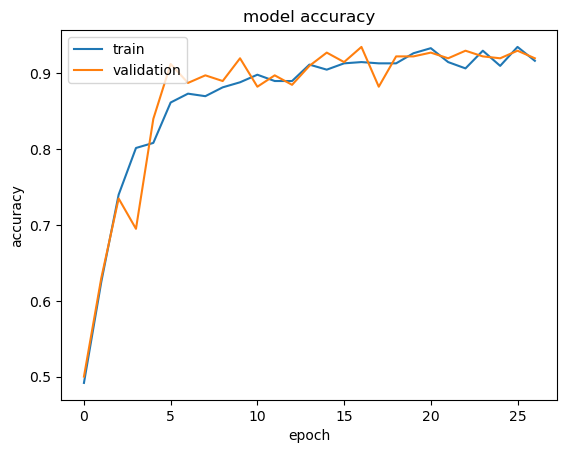

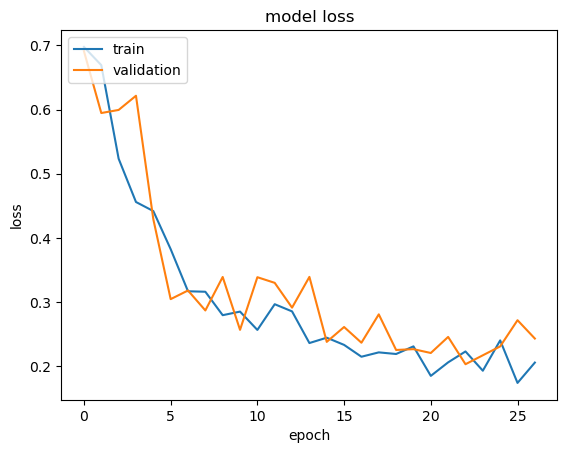

In [30]:
def Train_CNN_Model(model):
    
    # -------------------------------------------------------------------------
    #                        Train CNN Model 
    # -------------------------------------------------------------------------
    
    
    # create data generators    
    train_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True,
                                     rotation_range=10,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,                                     
                                     brightness_range=[0.2,1.0],
                                     )
    
    valid_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
  
   
    # prepare iterators
    batch_size=32
    train_it = train_datagen.flow_from_directory('Data/train/',classes =('normal','abnormal'),batch_size=batch_size, target_size=(224, 224))
    valid_it = valid_datagen.flow_from_directory('Data/val/',classes =('normal','abnormal'),batch_size=batch_size, target_size=(224, 224))


    epochs=100;
    
    # Early stopping
    es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10)
    
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=valid_it, 
                                  validation_steps=len(valid_it), epochs=epochs,callbacks=[es], verbose=1 )
    
    
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

	# save model
    model.save('medical_diagnosis_cnn_model.h5')

model = Build_CNN_Model()

Train_CNN_Model(model)

#### Compared to our previous model, we have achieved 90% accuracy after 27 Epochs

Found 624 images belonging to 2 classes.


/Users/ibrahimirfan/anaconda3/lib/python3.10/site-packages/keras/preprocessing/image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/ibrahimirfan/anaconda3/lib/python3.10/site-packages/keras/preprocessing/image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


20/20 [==============================] - 7s 318ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Confusion Matrix
 -------------------------
[[121 113]
 [ 14 376]]
Accuracy: 0.796474
Precision: 0.768916
Recall: 0.964103
F1 score: 0.855518
ROC AUC: 0.882627


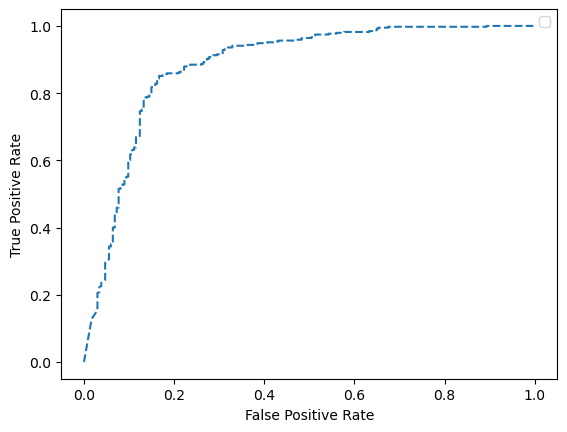

In [31]:
def Evaluate_CNN_Model():
    # -------------------------------------------------------------------------
    #                        Evaluate CNN Model 
    # -------------------------------------------------------------------------
    
    # load model
    model = load_model('medical_diagnosis_cnn_model.h5')
    
    # load test data
    batch_size=32
    test_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
    test_it = test_datagen.flow_from_directory('Data/test/',classes =('normal','abnormal'), 
                                               shuffle=False,batch_size=batch_size, target_size=(224, 224))
    
    y_true = test_it.classes;

    y_pred = model.predict(test_it, steps=len(test_it), verbose=1)

    
    y_pred_prob = y_pred[:,1]

     
    y_pred_binary =  y_pred_prob > 0.5
   
    #Confution Matrix    
    print('\nConfusion Matrix\n -------------------------')    
    print(confusion_matrix(y_true,y_pred_binary));
    
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_true, y_pred_binary)
    print('Accuracy: %f' % accuracy)
    
    
    # precision tp / (tp + fp)
    precision = precision_score(y_true, y_pred_binary)
    print('Precision: %f' % precision)
    
    # recall: tp / (tp + fn)
    recall = recall_score(y_true, y_pred_binary)
    print('Recall: %f' % recall)
    
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_true, y_pred_binary)
    print('F1 score: %f' % f1)    
       
    # ROC AUC
    auc = roc_auc_score(y_true, y_pred_prob)
    print('ROC AUC: %f' % auc)
    
    
    # calculate roc curves
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
        
    # plot the roc curve for the model
    plt.figure()
    plt_False_Positive_vs_True_Positive.plot(fpr, tpr, linestyle='--', label='')
    
    # axis labels
    plt_False_Positive_vs_True_Positive.xlabel('False Positive Rate')
    plt_False_Positive_vs_True_Positive.ylabel('True Positive Rate')
       
    # show the legend
    plt_False_Positive_vs_True_Positive.legend()
    # show the plot
    plt_False_Positive_vs_True_Positive.show()
    
Evaluate_CNN_Model()

#### The results clearly indicate that our CNN Model has improved alot from before after hyperparameter tuning and integrating different optimizers 

## Model Visualization

In [40]:
from keras.models import Model,load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

1/1 [==============================] - 0s 179ms/step


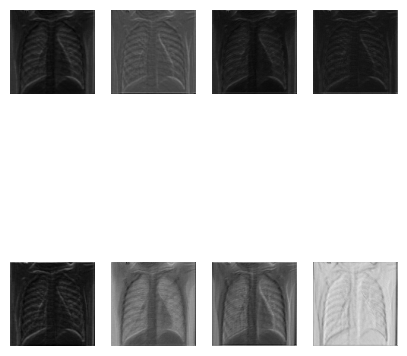

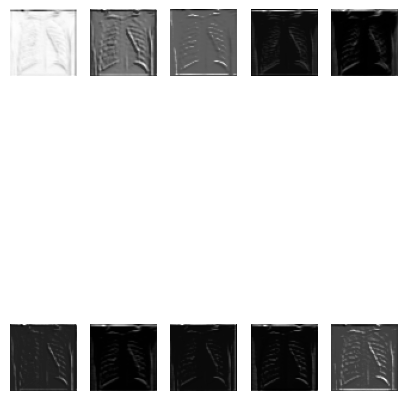

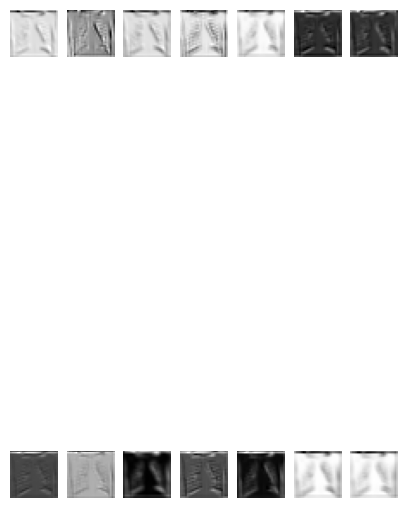

In [42]:
def Visualize_CNN_Model():
    # -------------------------------------------------------------------------
    #                        Visualize CNN Model 
    # -------------------------------------------------------------------------
    # load model
    model = load_model('medical_diagnosis_cnn_model.h5')
    
    # load the image    
    img = load_img("data/test/normal/IM-0009-0001.jpeg", target_size=(224, 224))              
    
    # convert to array
    img = img_to_array(img)

    # reshape and scale image
    img = img.reshape(1, 224, 224, 3)
    img = img.astype('float32')    
    img = img / 255             

    # create a new CNN activation_model
    layer_outputs = [layer.output for layer in model.layers[:10]]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    
    # pass image through CNN activation_model 
    activations = activation_model.predict(img)

    # Vislalize intermediate layre    
    Display_Activation_Layers(activations, 4, 2, 3)
    
    Display_Activation_Layers(activations, 5, 2, 7)
 
    Display_Activation_Layers(activations, 7, 2, 9)
           
    
    
    
def Display_Activation_Layers(activations, col_size, row_size, act_index): 
    
    activation = activations[act_index]
    
    activation_index=0
    
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    
    for row in range(0,row_size):
    
        for col in range(0,col_size):
        
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            
            ax[row][col].axis('off')
            
            activation_index += 1
            
Visualize_CNN_Model()